In [201]:
import numpy
from PIL import ImageTk, Image, ImageDraw
import PIL
from matplotlib.pyplot import imshow
from matplotlib.pyplot import plot

In [164]:
train = numpy.loadtxt(open("train.csv", "rb"), delimiter=",", skiprows=1)
numpy.random.shuffle(train)
train, test = train[:5000, :], train[5000:, :]

In [183]:
print(train.shape)
print(test.shape)

(5000, 785)
(37000, 785)


**Start with previewing some of the images**

In [202]:
currentImage = 0

def getNextImage():
    global currentImage
    img = Image.new('RGB', (28, 28))
    print(train[currentImage][0])
    for x in range(1, 785):
        offset = x - 1
        pixelvalue = round(train[currentImage][x])
        img.putpixel((offset%28, offset//28), (pixelvalue,pixelvalue,pixelvalue))
    currentImage += 1
    return img

8.0


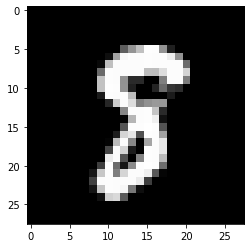

In [203]:
first = getNextImage()
imshow(numpy.asarray(first))

2.0


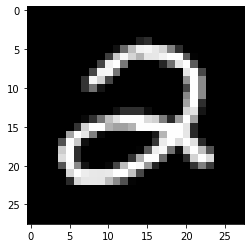

In [204]:
second = getNextImage()
imshow(numpy.asarray(second))

2.0


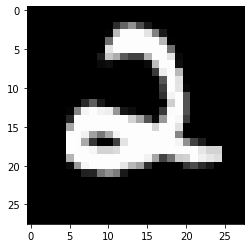

In [205]:
third = getNextImage()
imshow(numpy.asarray(third))

**Training**

3.0


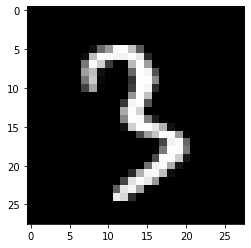

In [206]:
fourth = getNextImage()
imshow(numpy.asarray(fourth))

**Training the model using gradient descent**

In [186]:
theta = (numpy.random.rand(784, 10) + 1)/10000

In [187]:
import sigmoid
def costFunction(theta, X, y):
    m = X.shape[0]
    preds = numpy.array(sigmoid.getSigmoid(numpy.matmul(X, theta)), dtype=float)
    preds[preds == 0] = 0.000000001
    preds[preds == 1] = 0.999999999
    each = -1 * y * numpy.log(preds) - (1 - y) * numpy.log(1 - preds)
    return 1/m * numpy.sum(each)

Initital cost for 0 3.3386102957311756
Final cost for 0 0.026001359377988833
Initital cost for 1 3.7222778474060574
Final cost for 1 0.024730095649882572
Initital cost for 2 3.5218582081158196
Final cost for 2 0.08039749330139749
Initital cost for 3 3.5320070790443125
Final cost for 3 0.09256021097682461
Initital cost for 4 3.6303043981396597
Final cost for 4 0.0555467244212284
Initital cost for 5 3.635883085904658
Final cost for 5 0.08638041534069558
Initital cost for 6 3.522286675254622
Final cost for 6 0.03916135221855766
Initital cost for 7 3.5536764342101264
Final cost for 7 0.04994352327539777
Initital cost for 8 3.4915722741588153
Final cost for 8 0.14551726843369453
Initital cost for 9 3.6157109785052644
Final cost for 9 0.10602768814913766


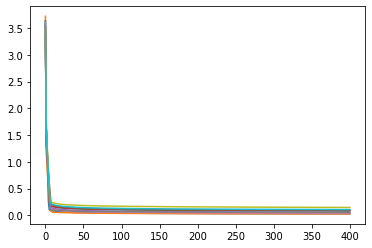

In [188]:
alpha = 0.00001
for i in range(0, 10):
    y = numpy.array(numpy.copy(train[:, 0]), dtype=float)
    y[y != i] = 11
    y[y == i] = 1
    y[y == 11] = 0
    X = numpy.array(train[:, 1:785], dtype=float)
    currentTheta = numpy.array(theta[:, i], dtype=float)
    m = X.shape[0]
    cost = costFunction(currentTheta, X, y)
    print("Initital cost for " + str(i), cost)
    plotX = [0]
    plotY = [cost]
    for iteration in range(0, 400):
        preds = sigmoid.getSigmoid(numpy.matmul(X, currentTheta))
        error = (preds - y).reshape(preds.shape+(1,))
        grad = (numpy.matmul(X.transpose(), error) * 1/m)
        # comment below implements gradient checking by estimating the derivative for theta #80
        # this should be equal to grad[80] unless there is a bug
        
        # theta1 = numpy.copy(currentTheta)
        # theta2 = numpy.copy(currentTheta)
        # theta1[80] += 0.001
        # theta2[80] -= 0.001
        # print((costFunction(theta1, X, y) - costFunction(theta2, X, y)) / 0.002)
        
        grad = grad[:, 0]
        currentTheta -= alpha * grad
        plotX.append(iteration + 1)
        plotY.append(costFunction(currentTheta, X, y))
    print("Final cost for " + str(i), costFunction(currentTheta, X, y))
    theta[:, i]  = currentTheta
    plot(plotX, plotY)

In [207]:
testPreds = numpy.argmax(numpy.matmul(test[:, 1:], theta), axis=1)
print(numpy.sum(testPreds == test[:, 0])/(test.shape[0]))

0.893972972972973


**Logistic regression can guess the number with an accuracy of around 89%**

In [240]:
numpy.savetxt("weights.csv", theta, delimiter=",")

In [241]:
demoTest = numpy.loadtxt(open("test.csv", "rb"), delimiter=",", skiprows=1)

**Testing the model with a different unlabeled dataset**  <br />
Overall it seems to be doing well considering that it is just a logistic regression model. But, it does make a few mistakes.

In [243]:
currentDemoImage = 0
def getNextDemoImage():
    global currentDemoImage
    img = Image.new('RGB', (28, 28))
    print(demoTest[currentImage][0])
    for x in range(784):
        pixelvalue = round(demoTest[currentDemoImage][x])
        img.putpixel((x%28, x//28), (pixelvalue,pixelvalue,pixelvalue))
    currentDemoImage += 1
    return img

Guess 2
0.0


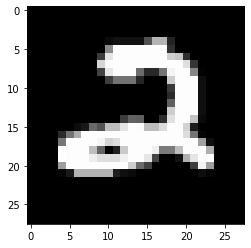

In [244]:
def getNextGuess():
    print("Guess", numpy.argmax(numpy.matmul(demoTest[currentDemoImage, :], theta)))
    nxt = getNextDemoImage()
    imshow(numpy.asarray(nxt))

getNextGuess()

Guess 0
0.0


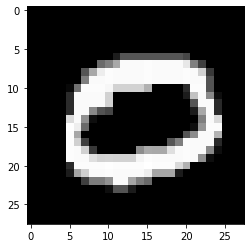

In [245]:
getNextGuess()

Guess 9
0.0


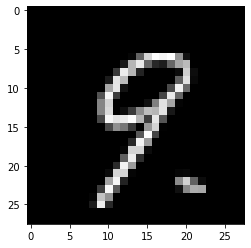

In [246]:
getNextGuess()

Guess 9
0.0


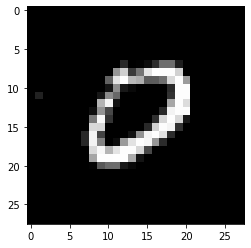

In [247]:
getNextGuess()

Guess 3
0.0


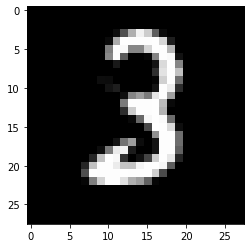

In [248]:
getNextGuess()

Guess 7
0.0


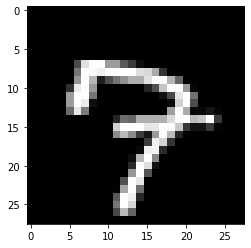

In [249]:
getNextGuess()

Guess 0
0.0


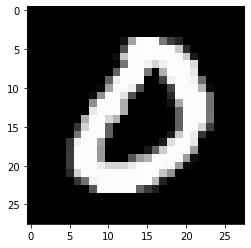

In [250]:
getNextGuess()

Guess 3
0.0


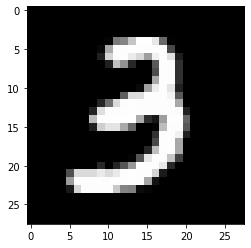

In [251]:
getNextGuess()

Guess 0
0.0


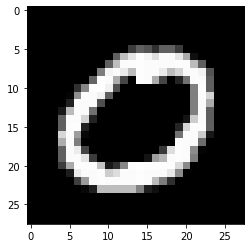

In [252]:
getNextGuess()

Guess 3
0.0


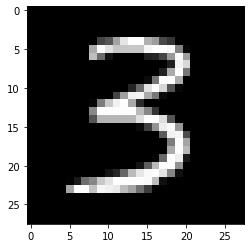

In [253]:
getNextGuess()

Guess 5
0.0


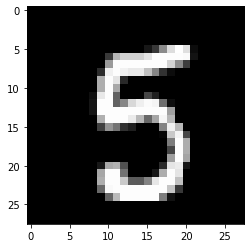

In [254]:
getNextGuess()